In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline 
pd.set_option('display.max_columns', None)

**Part 1: Analyzing Best-Seller Trends Across Product Categories**

Objective: Understand the relationship between product categories and their best-seller status.

Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descendingtacked bar chart.

In [9]:
df = pd.read_csv("C:/Users/astri/Ironhack/Labs/amz_uk_price_prediction_dataset.csv.zip")

In [18]:
#category con el best seller como se relacionan
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [13]:
len(df)

2443651

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [24]:
cat = df.select_dtypes(exclude="number")
num = df.select_dtypes(include="number")
cat.columns

Index(['asin', 'title', 'isBestSeller', 'category'], dtype='object')

In [22]:
df.nunique()

uid                  2443651
asin                 2222742
title                2077591
stars                     42
reviews                19446
price                  82916
isBestSeller               2
boughtInLastMonth         25
category                 296
dtype: int64

In [30]:
df.isBestSeller.unique()

array([False,  True])

Podemos ver que la categoria de isBestSeller es Discrete numerical, pero la trataremos como categorical porque solo hay True or False VS  Category que es Categorical.

**Create a crosstab between the product category and the isBestSeller status.**


In [32]:
# crosstab category
pd.crosstab(index=df['category'],
            columns='count')

col_0,count
category,
3D Printers,248
3D Printing & Scanning,4067
Abrasive & Finishing Products,250
Action Cameras,1697
Adapters,254
...,...
Wind Instruments,250
Window Treatments,239
Women,17772


In [34]:
# crosstab category and isBestSeller
# HAZ una tabla de contingencia entre estas dos categoricas y llamala: crosstab_result

crosstab_result = pd.crosstab( index = df["category"],columns = df["isBestSeller"])
crosstab_result

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [40]:
crosstab_result.nlargest(5,True)

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306


In [48]:
#Are there categories where being a best-seller is more prevalent?

#No, there is not a category where being a best seller is relevant, 
#as we can se for example the category Grocery is the highest with True (556) but is not relevant vs the False(9008)

Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.
Visualizations:




In [50]:
#tiene una sub libreria de estadistica de donde sacamos todo.
from scipy.stats import chi2_contingency

In [52]:
# Chi-square test for 'category' and 'isBestSeller', pongo los dos primeros porque me da 4 cosas. 
#si quiero puedo poner dof,expected_freq. 
#chi2_stats, chi2_pvalue, dof, expected_freq = chi2_contingency(crosstab_result)

chi2_stats, chi2_pvalue, _, _ = chi2_contingency(crosstab_result) #siempre usaremos solo chi2_stats, chi2_pvalue, 

In [54]:
#el chi2 es tan bajo entonces rechazamos la hipotesis nula, porque realmente tienen relacion fuerte entre una y la otra
#siempre que chi2 sea peque;o rechazamos la hipotesis nula. En este caso yo considero que no tienen relacion pero chi2 dice que si esto pasa
#por los datos.
chi2_pvalue

0.0

In [56]:
from scipy.stats.contingency import association

In [58]:
association(crosstab_result, method='cramer')

0.1222829439760564

Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

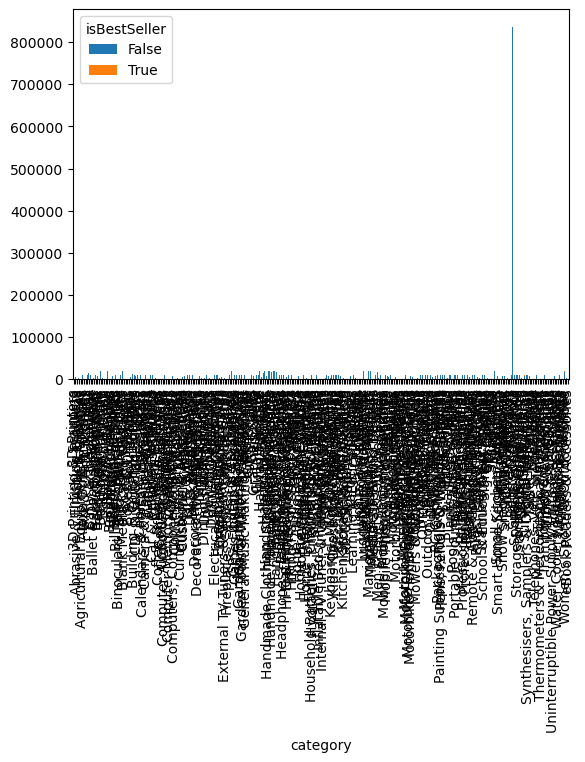

In [60]:
crosstab_result.plot(kind='bar', stacked=True)
plt.show()

In [84]:
#the plot above is not visible therefore we create a new one with the ten tops.
crosstab_result5 = crosstab_result.nlargest(20,False)

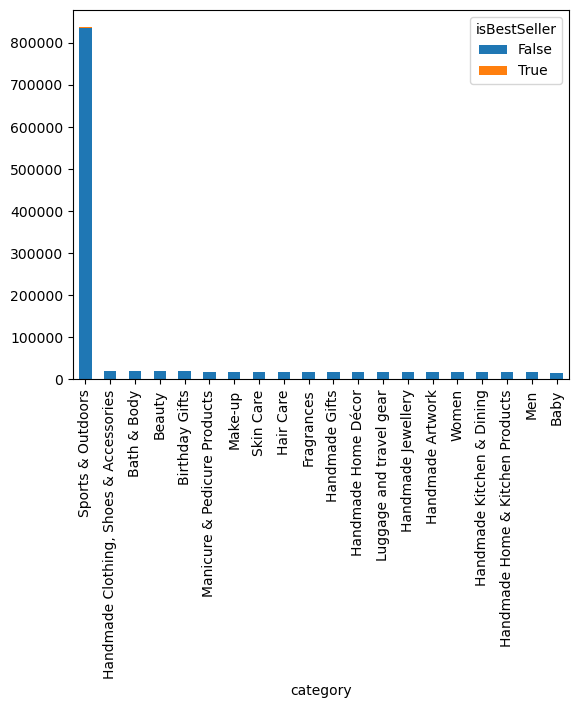

In [86]:
crosstab_result5.plot(kind='bar', stacked=True)
plt.show()

**Part 2: Exploring Product Prices and Ratings Across Categories and Brands**

Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.
Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.
Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


In [115]:
df.price.nsmallest(20)

342871     0.0
546823     0.0
547321     0.0
547507     0.0
794353     0.0
830446     0.0
830795     0.0
833556     0.0
836136     0.0
1025782    0.0
1075630    0.0
1181667    0.0
1184254    0.0
1324575    0.0
1373497    0.0
1422882    0.0
1531995    0.0
1532255    0.0
1611982    0.0
1696245    0.0
Name: price, dtype: float64

In [95]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [111]:
df_sinoutlier = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]
df_sinoutlier

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [159]:
df_top20 = df_sinoutlier["category"].value_counts().head(20).index
df_top20

Index(['Sports & Outdoors', 'Beauty', 'Bath & Body',
       'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts', 'Handmade Home Décor',
       'Luggage and travel gear', 'Women', 'Fragrances',
       'Handmade Kitchen & Dining', 'Handmade Artwork',
       'Handmade Home & Kitchen Products', 'Handmade Jewellery', 'Men',
       'Baby'],
      dtype='object', name='category')

In [167]:
df_final = df_sinoutlier[df_sinoutlier['category'].isin(df_top20)]

In [169]:
df_final

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


C:\Users\astri\AppData\Local\Temp\ipykernel_8624\2497993016.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_final, x="category", y="price", palette="coolwarm")


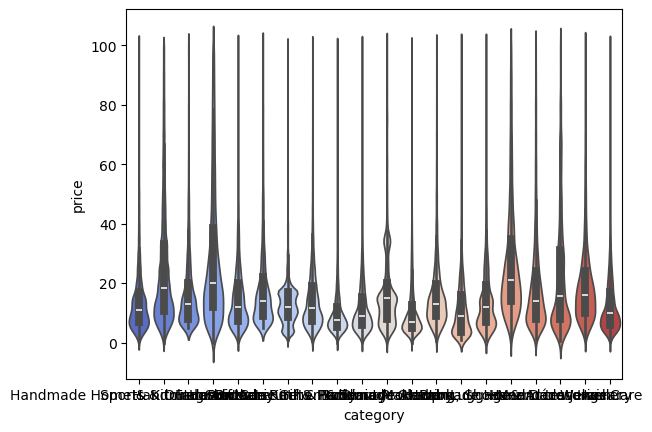

In [171]:
sns.violinplot(data=df_final, x="category", y="price", palette="coolwarm") 
plt.show()

Create a bar chart comparing the average price of products for the top 10 product categories (based on count). Which product category commands the highest average price? Don't filter here by top categories. Box Plots:

In [175]:
df_top10 = df_sinoutlier["category"].value_counts().head(10).index
df_top10

Index(['Sports & Outdoors', 'Beauty', 'Bath & Body',
       'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts'],
      dtype='object', name='category')

In [185]:
df_final10 = df_sinoutlier[df_sinoutlier['category'].isin(df_top10)]
df_final10

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
82168,89488,B07QDMLMJH,Nextbase Powered Mount Variations For Cameras ...,4.7,1223,19.95,False,0,Sports & Outdoors
82169,89489,B09TQMCNY7,WOLFANG Action Camera GA100 with 64GB microSDX...,4.2,55,49.99,False,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


C:\Users\astri\AppData\Local\Temp\ipykernel_8624\1086142989.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_final10, x="category", y="price", palette="coolwarm")


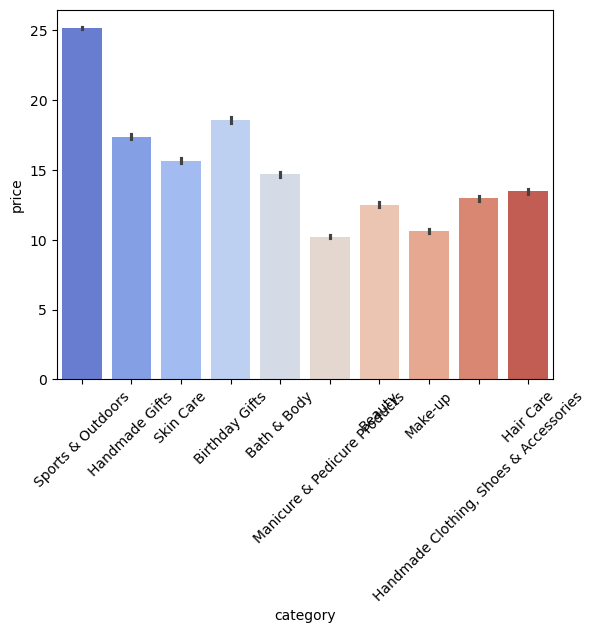

In [189]:
sns.barplot(data=df_final10, x="category", y="price", palette="coolwarm")
plt.xticks(rotation = 45)
plt.show()

In [191]:
#Which product category commands the highest average price? 
#The sports and outdoors and handmade gifts

In [ ]:
#Visualize the distribution of product ratings based on their category using side-by-side box plots.
#Filter out the top 10 categories based on count for better visualization. Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

In [193]:
df_ratings10 = df_sinoutlier["category"].value_counts().head(10).index
df_top10

Index(['Sports & Outdoors', 'Beauty', 'Bath & Body',
       'Manicure & Pedicure Products',
       'Handmade Clothing, Shoes & Accessories', 'Make-up', 'Skin Care',
       'Hair Care', 'Birthday Gifts', 'Handmade Gifts'],
      dtype='object', name='category')

In [195]:
df_final10rating = df_sinoutlier[df_sinoutlier['category'].isin(df_top10)]
df_final10rating

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
82163,89483,B07DLGZ828,Neutrade GoPro 3M Sticky Pads Double Sided Adh...,4.2,3116,6.49,False,0,Sports & Outdoors
82164,89484,B09HGZHXJT,"WOLFANG Action Camera 4K 20MP GA100, Waterproo...",4.2,2594,49.99,False,0,Sports & Outdoors
82167,89487,B08LD4VXGL,FitStill 60M/196FT Waterproof Case for Go Pro ...,4.5,9879,16.98,True,0,Sports & Outdoors
82168,89488,B07QDMLMJH,Nextbase Powered Mount Variations For Cameras ...,4.7,1223,19.95,False,0,Sports & Outdoors
82169,89489,B09TQMCNY7,WOLFANG Action Camera GA100 with 64GB microSDX...,4.2,55,49.99,False,0,Sports & Outdoors
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


C:\Users\astri\AppData\Local\Temp\ipykernel_8624\279675691.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_final10, x="category", y="stars", palette="coolwarm")


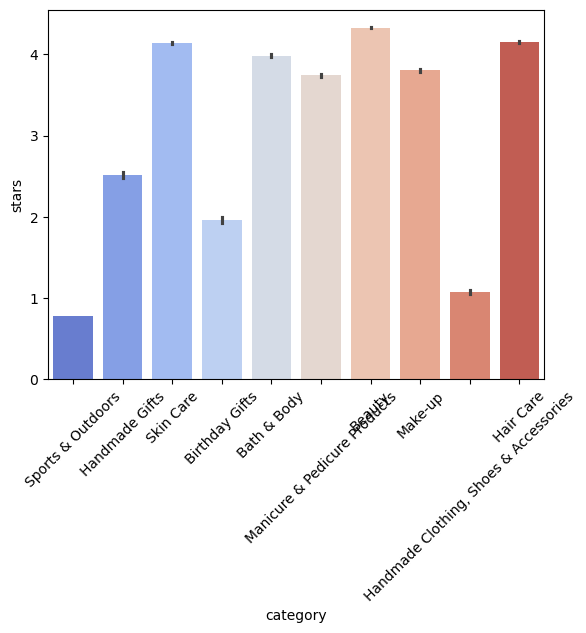

In [197]:
sns.barplot(data=df_final10rating, x="category", y="stars", palette="coolwarm")
plt.xticks(rotation = 45)
plt.show()

C:\Users\astri\AppData\Local\Temp\ipykernel_8624\1225519128.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final10rating, x="category", y="stars", palette="coolwarm")


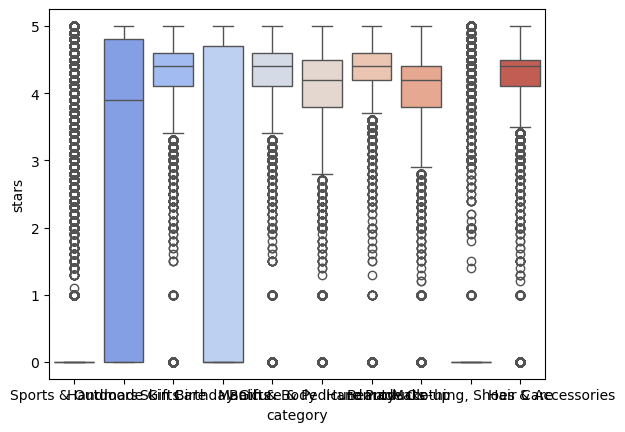

In [199]:
sns.boxplot(data=df_final10rating, x="category", y="stars", palette="coolwarm")
plt.show()

In [205]:
#Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

median_ratings = df_sinoutlier.groupby("category")["stars"].median()


highest_median_category = median_ratings.idxmax()
highest_median_rating = median_ratings.max()

# Display the result
highest_median_category, highest_median_rating


('Computer Memory', 4.7)

In [ ]:
#we can see that the category with the highest median rating from customers is Computer Memory with 4.7

Part 3: Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.

Correlation Coefficients:

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?
Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.


In [207]:
correlacion_pricestars = df_sinoutlier["price"].corr(df_sinoutlier["stars"])

In [209]:
correlacion_pricestars

-0.0776729987818137

In [211]:
#Is there a significant correlation between product price and its rating?
#we can see that the correlation is negative.

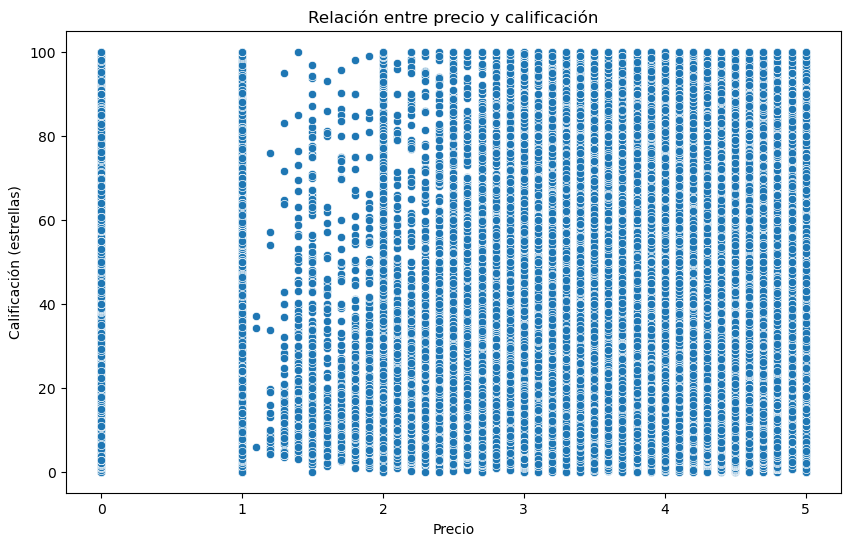

In [215]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sinoutlier, x="stars", y="price")
plt.title("Relación entre precio y calificación")
plt.xlabel("Precio")
plt.ylabel("Calificación (estrellas)")
plt.show()

In [223]:
cat = df_sinoutlier.select_dtypes(exclude="number")
num = df_sinoutlier.select_dtypes(include="number")
num

,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0
...,...,...,...,...,...
2443646,2828589,0.0,0,22.34,0
2443647,2828590,0.0,0,97.99,0
2443648,2828591,0.0,0,52.99,0
2443649,2828592,4.3,404,79.99,0


In [221]:
correlation_matrix = num.corr()

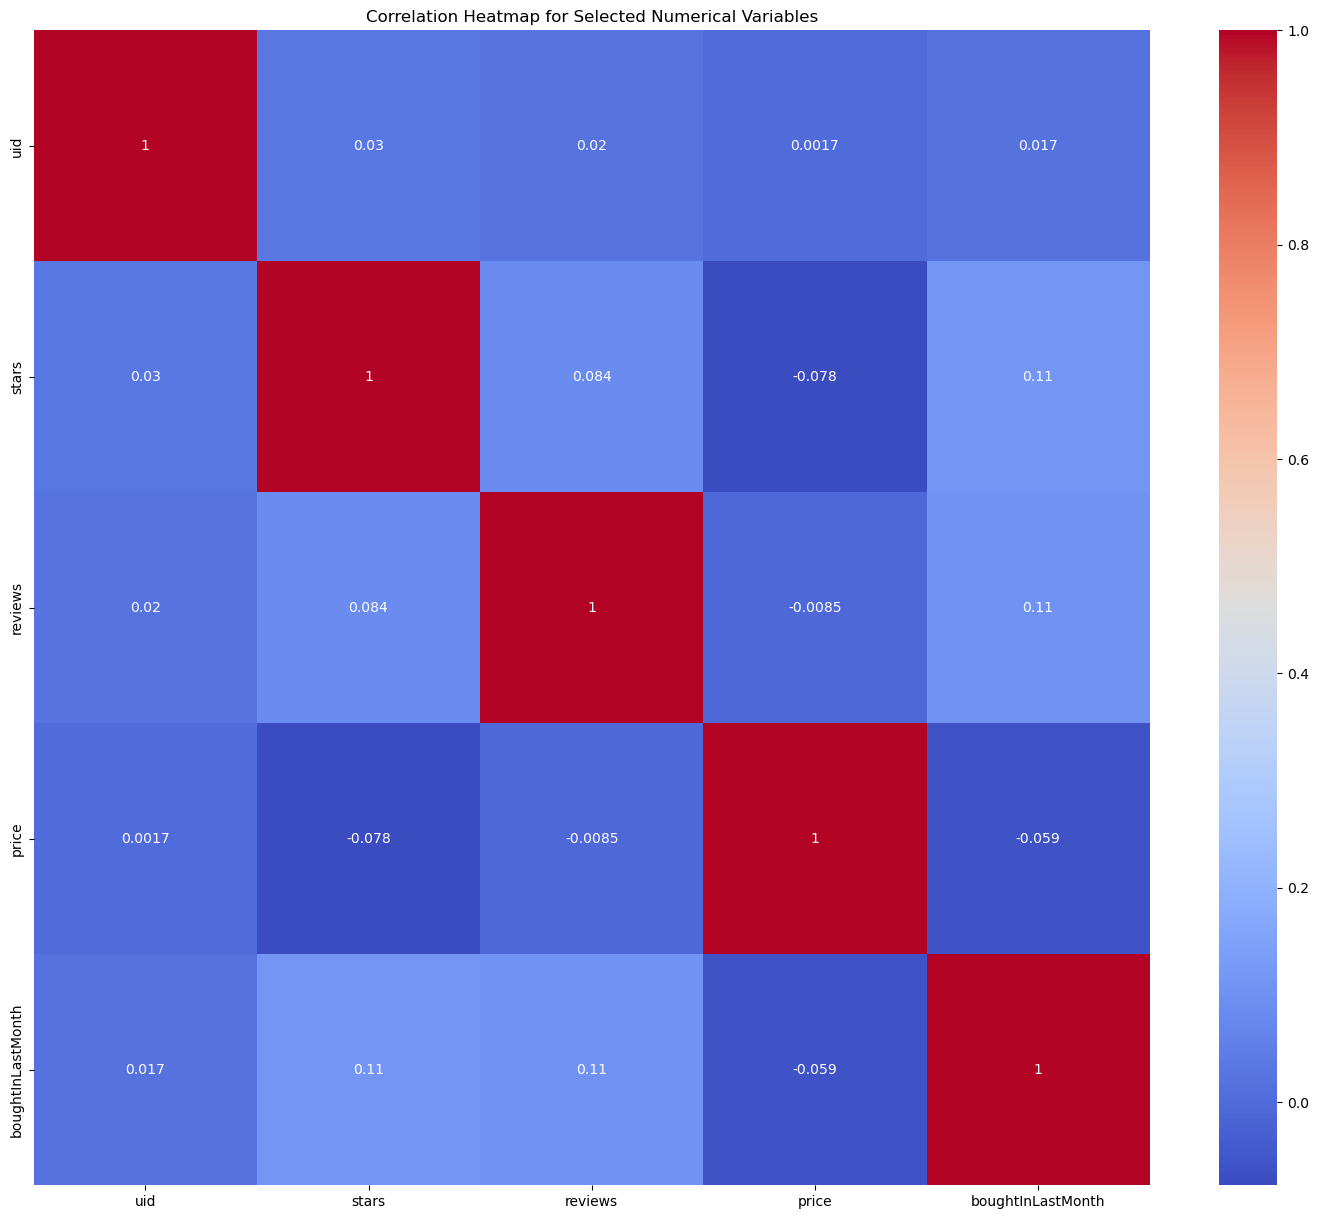

In [225]:
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

In [229]:

spearman_correlations_sorted = num.corrwith(df_sinoutlier['stars'], method='pearson').sort_values(ascending=False) # positive ones
spearman_correlations_sorted

stars                1.000000
boughtInLastMonth    0.113994
reviews              0.083920
uid                  0.030288
price               -0.077673
dtype: float64

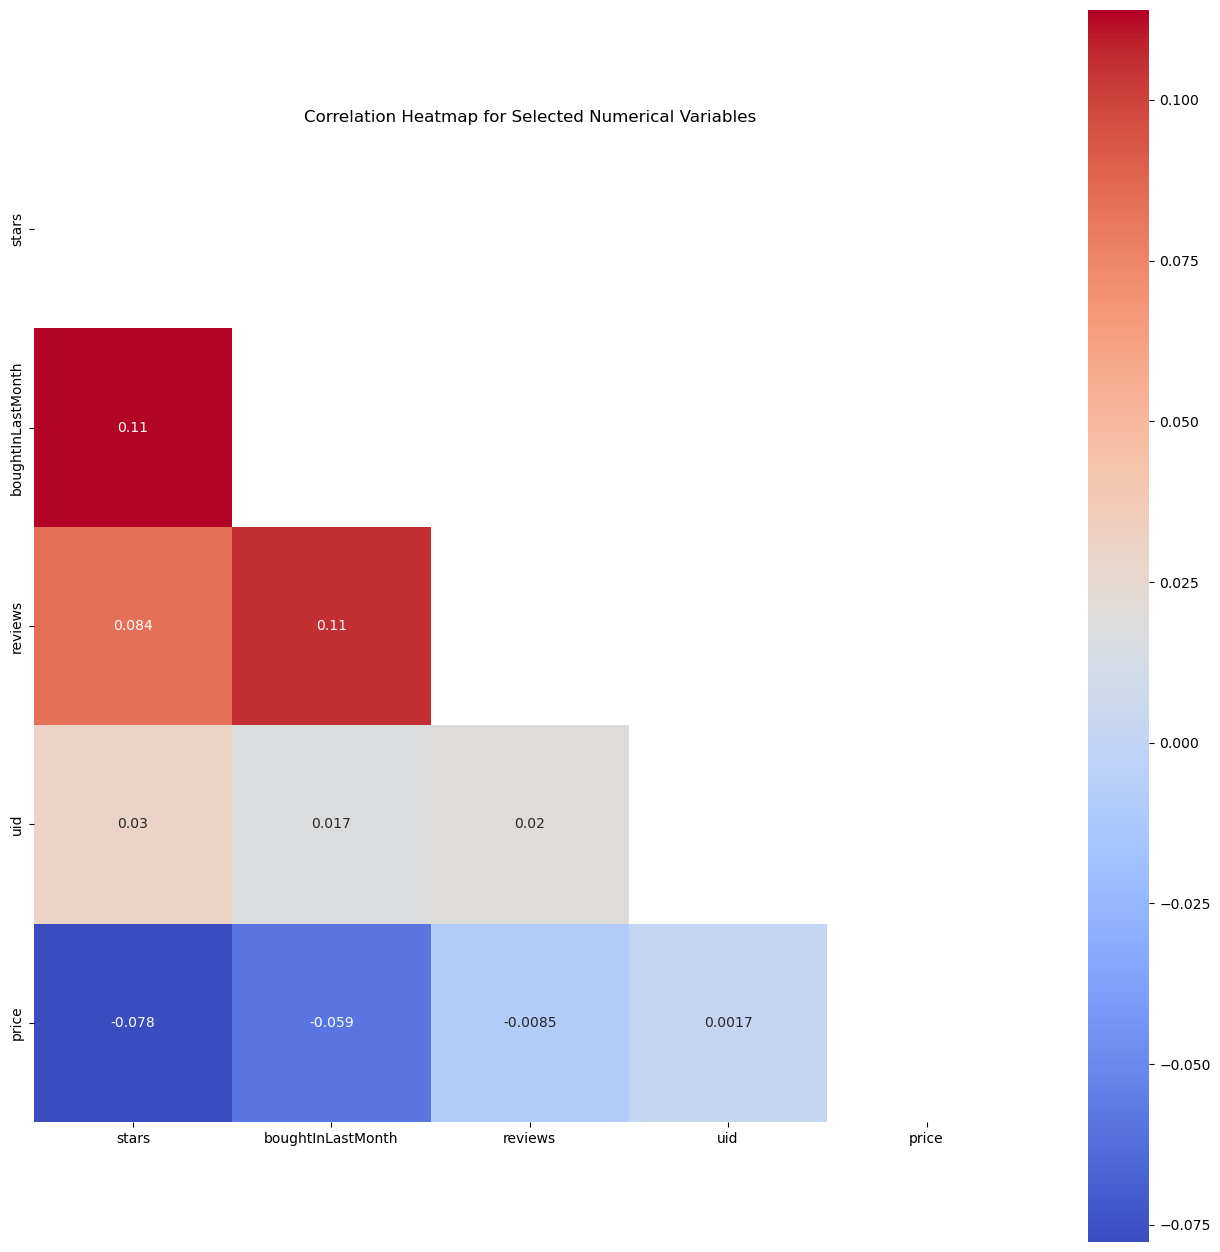

In [231]:
# Calculando la matriz de correlación
correlation_matrix = num[spearman_correlations_sorted.index].corr()

# Configurando el tamaño de la figura en matplotlib
plt.figure(figsize=(16, 16))

# Creando una máscara para la mitad superior de la matriz, esto es solo paraquitar el duplicado, 
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Dibujando el heatmap con la máscara
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm", square=True)

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

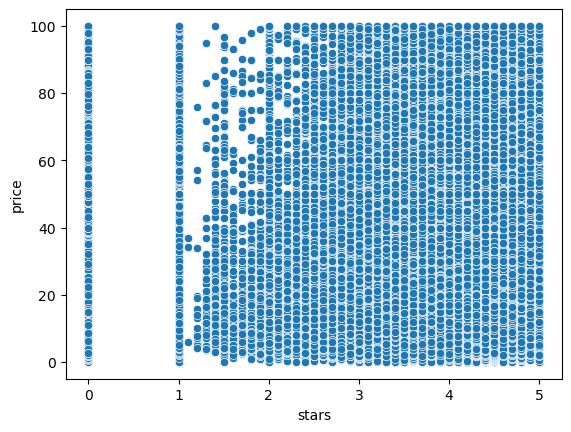

In [233]:
sns.scatterplot(data=df_sinoutlier, x='stars', y='price')
plt.show()

In [237]:
#What patterns can you observe? we dont have any patterns here. also we confirm it with the negative correlation.
